Menggunakan sklearn MLPClassifier

--- Memuat Dataset MNIST ---
Bentuk data: (70000, 784)
Training: (60000, 784)
Testing : (10000, 784)

--- Membangun Model ---

--- Melatih Model ---
Epoch 1/20
  acc=0.9650  val_acc=0.9607
Epoch 2/20
  acc=0.9757  val_acc=0.9660
Epoch 3/20
  acc=0.9832  val_acc=0.9713
Epoch 4/20
  acc=0.9861  val_acc=0.9713
Epoch 5/20
  acc=0.9896  val_acc=0.9739
Epoch 6/20
  acc=0.9917  val_acc=0.9752
Epoch 7/20
  acc=0.9943  val_acc=0.9777
Epoch 8/20
  acc=0.9944  val_acc=0.9766
Epoch 9/20
  acc=0.9950  val_acc=0.9760
Epoch 10/20
  acc=0.9938  val_acc=0.9744
Epoch 11/20
  acc=0.9948  val_acc=0.9760
Epoch 12/20
  acc=0.9921  val_acc=0.9721
Epoch 13/20
  acc=0.9966  val_acc=0.9756
Epoch 14/20
  acc=0.9931  val_acc=0.9719
Epoch 15/20
  acc=0.9969  val_acc=0.9779
Epoch 16/20
  acc=0.9973  val_acc=0.9776
Epoch 17/20
  acc=0.9980  val_acc=0.9792
Epoch 18/20
  acc=0.9979  val_acc=0.9782
Epoch 19/20
  acc=0.9984  val_acc=0.9805
Epoch 20/20
  acc=0.9977  val_acc=0.9786

--- 

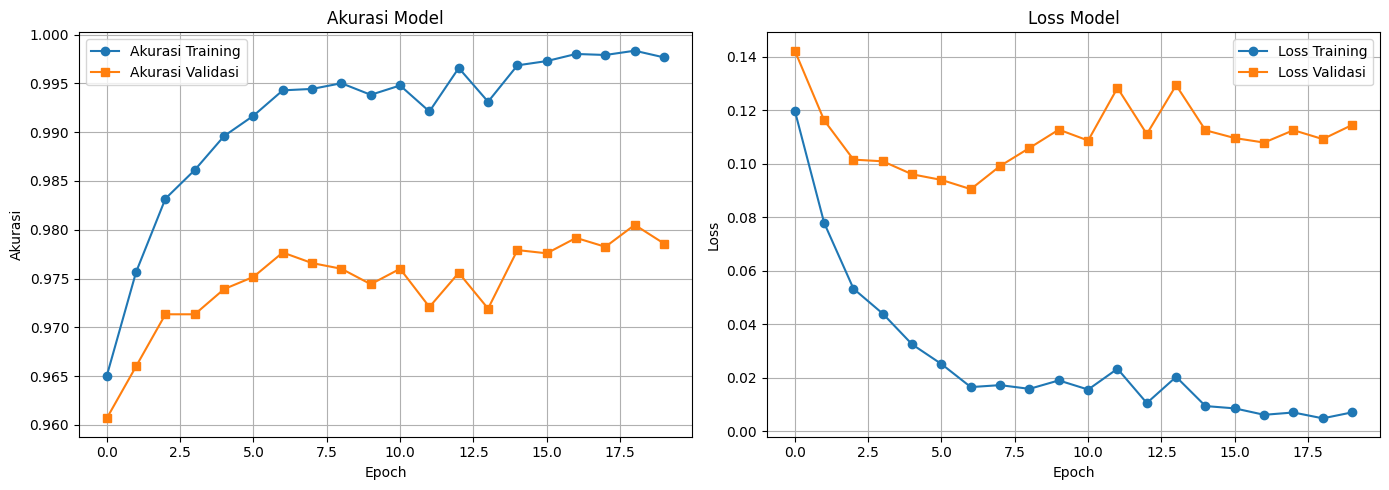


--- Visualisasi Prediksi ---


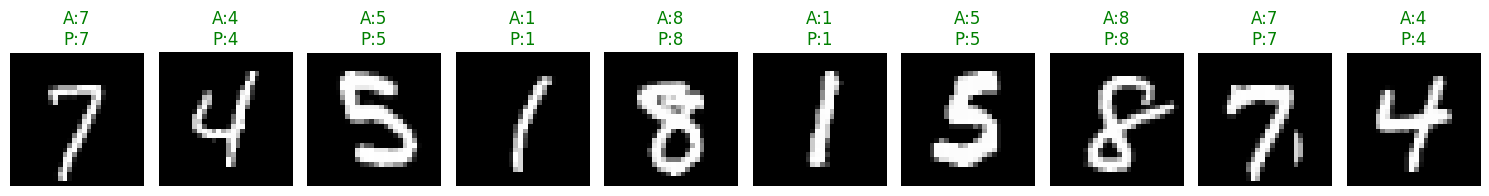


RINGKASAN
✓ Iterasi training : 20
✓ Akurasi test     : 0.9805
✓ Model disimpan   : models/mnist_mlp.pkl


In [ ]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
from copy import deepcopy

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
print("Menggunakan sklearn MLPClassifier")

# =====================================================
# LANGKAH 1: MEMUAT DAN PRA-PEMROSESAN DATA
# =====================================================
print("\n--- Memuat Dataset MNIST ---")

# Load MNIST dari OpenML
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = mnist.data.astype("float32")
y = mnist.target.astype("int64")

print(f"Bentuk data: {X.shape}")

# Normalisasi
X /= 255.0

# Train-test split (60k / 10k)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print(f"Training: {x_train.shape}")
print(f"Testing : {x_test.shape}")

# =====================================================
# LANGKAH 2: MEMBANGUN MODEL
# =====================================================
print("\n--- Membangun Model ---")

epochs = 20  # sklearn iterasi, bukan epoch DL sejati
learning_rate = 0.001
hidden_layer_sizes = (384, 64)
batch_size = 128

model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation="relu",
    solver="adam",
    batch_size=batch_size,
    learning_rate="adaptive",
    learning_rate_init=learning_rate,
    warm_start=True,
    verbose=False,
    random_state=42,
)

# =====================================================
# LANGKAH 3: MELATIH MODEL + VALIDASI
# =====================================================
print("\n--- Melatih Model ---")

history_acc = []
history_val_acc = []
history_loss = []
history_val_loss = []

# Validation split manual
x_tr, x_val, y_tr, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

best_val_score = 0.0

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.fit(x_tr, y_tr)

    # Training metrics
    train_pred = model.predict(x_tr)
    train_prob = model.predict_proba(x_tr)

    acc = accuracy_score(y_tr, train_pred)
    loss = log_loss(y_tr, train_prob)

    # Validation metrics
    val_pred = model.predict(x_val)
    val_prob = model.predict_proba(x_val)

    val_acc = accuracy_score(y_val, val_pred)
    val_loss = log_loss(y_val, val_prob)

    # Simpan
    if val_acc > best_val_score:
        best_model = deepcopy(model)
        best_val_score = val_acc

    history_acc.append(acc)
    history_val_acc.append(val_acc)
    history_loss.append(loss)
    history_val_loss.append(val_loss)

    print(f"  acc={acc:.4f}  val_acc={val_acc:.4f}")

# =====================================================
# LANGKAH 4: EVALUASI MODEL
# =====================================================
print("\n--- Evaluasi Model ---")

test_pred = model.predict(x_test)
test_prob = model.predict_proba(x_test)

test_accuracy = accuracy_score(y_test, test_pred)
test_loss = log_loss(y_test, test_prob)

print(f"Loss data uji   : {test_loss:.4f}")
print(f"Akurasi data uji: {test_accuracy:.4f}")

# =====================================================
# LANGKAH 5: MENYIMPAN MODEL
# =====================================================
print("\n--- Menyimpan Model ---")

os.makedirs("models", exist_ok=True)

joblib.dump(best_model, "models/mnist_mlp.pkl")
print("✓ Model disimpan: models/mnist_mlp.pkl")

# =====================================================
# LANGKAH 6: MEMUAT MODEL
# =====================================================
print("\n--- Memuat Model ---")

loaded_model = joblib.load("models/mnist_mlp.pkl")
print("✓ Model berhasil dimuat!")

acc_loaded = accuracy_score(y_test, loaded_model.predict(x_test))
print(f"Akurasi model dimuat: {acc_loaded:.4f}")

# =====================================================
# LANGKAH 7: PREDIKSI
# =====================================================
print("\n--- Prediksi ---")

predictions = loaded_model.predict_proba(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)


# =====================================================
# LANGKAH 8: GRAFIK TRAINING
# =====================================================
print("\n--- Grafik Training ---")

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_acc, label="Akurasi Training", marker="o")
plt.plot(history_val_acc, label="Akurasi Validasi", marker="s")
plt.title("Akurasi Model")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_loss, label="Loss Training", marker="o")
plt.plot(history_val_loss, label="Loss Validasi", marker="s")
plt.title("Loss Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("models/training_history_sklearn.png", dpi=100)
plt.show()

# =====================================================
# LANGKAH 9: VISUALISASI PREDIKSI
# =====================================================
print("\n--- Visualisasi Prediksi ---")

plt.figure(figsize=(15, 3))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")

    color = "green" if predicted_classes[i] == y_test[i] else "red"
    plt.title(f"A:{y_test[i]}\nP:{predicted_classes[i]}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.savefig("models/predictions_sklearn.png", dpi=100)
plt.show()

# =====================================================
# RINGKASAN
# =====================================================
print("\n" + "=" * 60)
print("RINGKASAN")
print("=" * 60)
print(f"✓ Iterasi training : {epochs}")
print(f"✓ Akurasi test     : {best_val_score:.4f}")
print("✓ Model disimpan   : models/mnist_mlp.pkl")
print("=" * 60)